In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import uncertainties as u

In [29]:
directory = './output/'

In [30]:
big_df = pd.DataFrame(columns=['set', 'e', 'calo', 'diff', 'err'])

In [31]:
def get_diffs(filename, e_range):
    set_name = filename[:2]

    this_df = pd.read_csv(directory+filename)
    this_df = this_df[this_df['energyLim'] == e_range]
    diffs_df = pd.DataFrame(columns=['set', 'e', 'calo', 'diff', 'err'])

    for index in range(0, 24):
        this_calo = this_df.loc[this_df['caloNum'] == (index+1)].reset_index()
        #print(this_calo['m'])
        m = u.ufloat(this_calo['m'][0], this_calo['m_err'][0])
        c = u.ufloat(this_calo['c'][0], this_calo['c_err'][0])

        y_40 = m*40+c
        y_90 = m*90+c
        y_diff = y_40-y_90
        
        diffs_df.loc[index] = {'set':set_name,
                               'e':e_range,
                               'calo':index+1,
                               'diff':y_diff.nominal_value,
                               'err':y_diff.std_dev}
        
    return diffs_df

In [32]:
for filename in os.listdir(directory):
    if (filename[-4:] != '.csv'):
        continue
        
    for e_low in range(1100, 2900, 200):
        e_str = '{0}-{1}'.format(e_low, e_low+200)
        big_df = big_df.append(get_diffs(filename, e_str), ignore_index=True)

In [33]:
big_df.to_csv('./y_diffs_results/y_diffs.csv')

In [2]:
big_df = pd.read_csv('./y_diffs_results/y_diffs.csv')

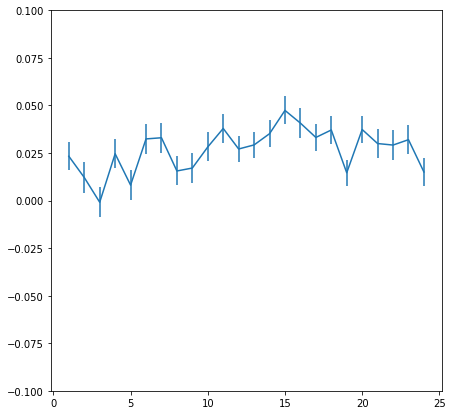

In [3]:
memes = big_df[(big_df['set'] == '1C') & (big_df['e'] == '1500-1700')]

fig, ax = plt.subplots(1,1)
fig.set_size_inches(7,7)

ax.errorbar(memes['calo'], memes['diff'], yerr=memes['err']);
ax.set_ylim(-0.1, 0.1);